# I. Accounts Status at Block Height 

Prepare account export files from [java-tron:account_export_6m](https://github.com/tronprotocol/java-tron/tree/account_export_6m). Dump into ./raw folder.


## 1. Read accounts dump


In [1]:
import pandas as pd
import copy
from matplotlib import pyplot as plt

__Notice:__ Change following constants as needed

In [2]:
from constants import AIRDROP_AMOUNT, BLACK_LIST
BLOCK_HEIGHT = 6523680
SUN = 1000000
MILLION = 1000000
THREADHOLD = 1  # trx in sun smaller than this value will be trim off
AIRDROP_FILE_NAME = 'account.csv'
TOKEN_NET_COST_MIN = 279    # 1 token
TOKEN_NET_COST_MAX = 283    # 10 B tokens
DYNAMIC_TOTAL_NET_WEIGHT = 6880167579      # 2/8/2019

In [3]:
all_account_dump_path = './raw/block_' + str(BLOCK_HEIGHT) + '_all_accounts.csv'
normal_account_dump_path = './raw/block_' + str(BLOCK_HEIGHT) + '_normal_accounts.csv'
contract_account_dump_path = './raw/block_' + str(BLOCK_HEIGHT) + '_contract_accounts.csv'
asset_account_dump_path = './raw/block_' + str(BLOCK_HEIGHT) + '_assetissue_accounts.csv'

all_acc_data = pd.read_csv(all_account_dump_path)
normal_acc_data = pd.read_csv(normal_account_dump_path)
contract_acc_data = pd.read_csv(contract_account_dump_path)
asset_acc_data = pd.read_csv(asset_account_dump_path)

print('All: ', all_acc_data.tail())
print('Normal: ', normal_acc_data.tail())
print('Contract: ', contract_acc_data.tail())
print('Asset Issue: ', asset_acc_data.tail())

All:                                      address  balance
1743867  TGJfesD476E8sB4EeMZukwyci2VMZRLHWq  1994000
1743868  TFqWSaoVBhomTSoJL2fqw5p6PrvgNhSS6o      341
1743869  TDnEYjB68dfbBCr7oqHePA5a2p7CGyaZpK        0
1743870  TQU8Mdg69sgZXosM3epVHFAXYLibL1DnsL  1000000
1743871  TFJv7MeBvSBsGWTmKJvskScoiUskMojVha        0
Normal:                                      address  balance
1739270  TGJfesD476E8sB4EeMZukwyci2VMZRLHWq  1994000
1739271  TFqWSaoVBhomTSoJL2fqw5p6PrvgNhSS6o      341
1739272  TDnEYjB68dfbBCr7oqHePA5a2p7CGyaZpK        0
1739273  TQU8Mdg69sgZXosM3epVHFAXYLibL1DnsL  1000000
1739274  TFJv7MeBvSBsGWTmKJvskScoiUskMojVha        0
Contract:                                   address  balance
4566  TY4JeDPGUhVod6A1x2RRDKjhYRCedcG6mn        0
4567  TD6qYgnHkduZ1K1KCJmPtuDHDhxrM5kJEy        0
4568  TMaXQvzpx7v6tB1B2Fox5dtcfQ8CJ8Mxpx        0
4569  TBCXm3HsoSBLLR7HoiG5ZGwSZKabQKtfTu        0
4570  TA1Kqpw81M32vqe2TCoJrMVrnvNjsqTQWx        0
Asset Issue:                          

## 2. Account Summary

### Overall

In [4]:
total_balance = all_acc_data['balance'][0]
total_sum = all_acc_data['balance'].sum()-all_acc_data['balance'][0]
print('Total trx balance(SUN): ', total_balance)
print('Total trx balance(TRX): ', total_balance/SUN)
print('Total trx balance(M-TRX): ', total_balance/(SUN*MILLION))
print('Sum of all accounts: ', total_sum)
print('Blackhole amount: ', total_sum-total_balance)

Total trx balance(SUN):  99267412131910600
Total trx balance(TRX):  99267412131.9106
Total trx balance(M-TRX):  99267.41213191059
Sum of all accounts:  -9124064775123350076
Blackhole amount:  -9223332187255260676


In [5]:
total_accounts = len(all_acc_data['balance']) - 1
print('Total accounts: ', total_accounts)

Total accounts:  1743871


In [6]:
total_none_zero_accounts = 0
i = 1
total_none_zero_accounts = len(all_acc_data['balance'].nonzero()[0])
print('Total None Zero Accounts: ', total_none_zero_accounts)

Total None Zero Accounts:  785056


### Normal Account

Normal accounts:  1739274
Volume(Million-TRX):  99197.95917414188
---------
Total:  1739274
>=1 SUN:  784387
>=1 TRX:  280564


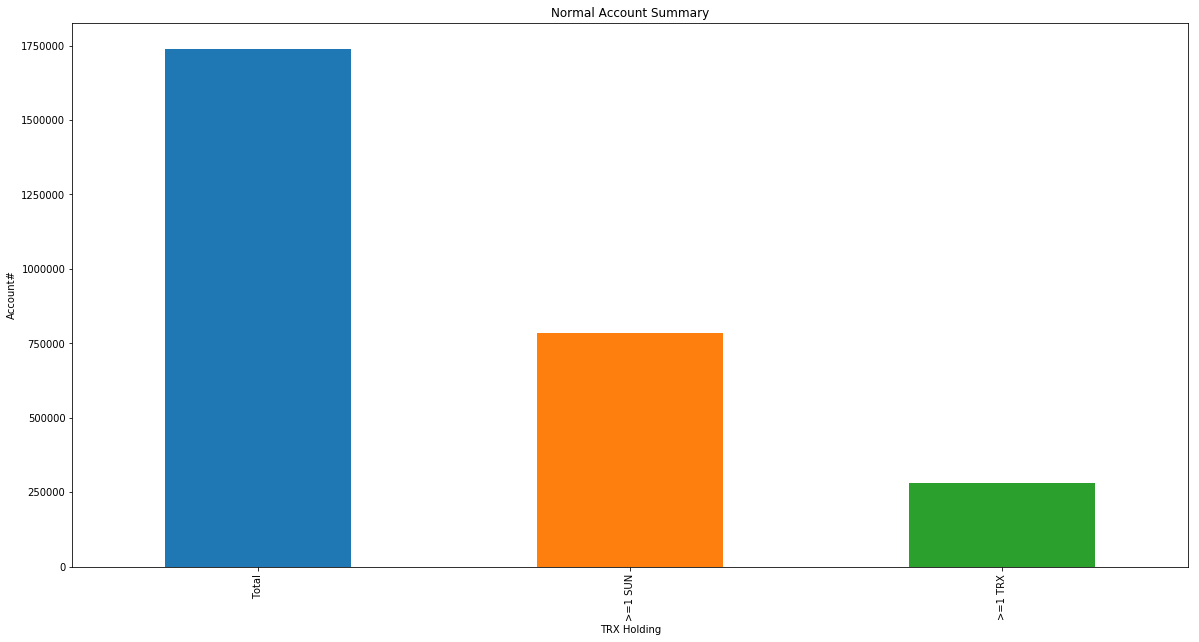

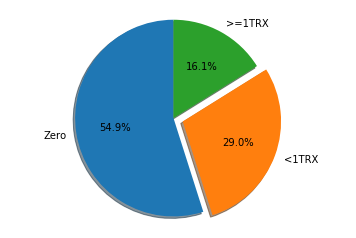

---------
Zero:  954887
<1TRX:  503823
>=1TRX:  280564


In [7]:
normal_accounts = len(normal_acc_data['balance']) - 1
normal_analysis = copy.deepcopy(normal_acc_data)
print('Normal accounts: ', normal_accounts)
print('Volume(Million-TRX): ', normal_acc_data['balance'][0]/(SUN*MILLION))


# all
acc_0 = len(normal_analysis['balance']) - 1
# 0
# normal_analysis = normal_analysis.drop(normal_acc_data[normal_acc_data['balance'] <= 0].index)
# acc_1 = acc_0 - len(normal_analysis['balance'])
acc_1 = len(normal_analysis.drop(normal_analysis[normal_analysis['balance'] < 1].index)) - 1
# 1 ~ 1,000,000
# normal_analysis = normal_analysis.drop(normal_acc_data[normal_acc_data['balance'] <= SUN].index)
# acc_2 = acc_1 - len(normal_analysis['balance'])
acc_2 = len(normal_analysis.drop(normal_analysis[normal_analysis['balance'] <= SUN].index)) - 1

"""
Draw Bar
"""
acc_draw = pd.Series([acc_0, acc_1, acc_2], index=['Total','>=1 SUN','>=1 TRX'])

acc_draw.plot.bar(figsize=(20,10))
plt.xlabel('TRX Holding')
plt.ylabel('Account#')
plt.title("Normal Account Summary");

print('---------')
print('Total: ', acc_0)
print('>=1 SUN: ', acc_1)
print('>=1 TRX: ', acc_2)

"""
Draw Pie
"""
num1 = acc_0 - acc_1
num2 = acc_1 - acc_2
num3 = acc_2
labels = 'Zero', '<1TRX', '>=1TRX'
sizes = [num1, num2, num3]
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print('---------')
print('Zero: ', num1)
print('<1TRX: ', num2)
print('>=1TRX: ', num3)

### Contract Account

In [8]:
contract_accounts = len(contract_acc_data['balance']) - 1
print('Contract accounts: ', contract_accounts)
print('Volume(Million-TRX): ', contract_acc_data['balance'][0]/(SUN*MILLION))

Contract accounts:  4570
Volume(Million-TRX):  69.452957758609


### Asset Issue Account

In [9]:
asset_accounts = len(asset_acc_data['balance']) - 1
print('Asset Issue accounts: ', asset_accounts)
print('Volume(TRX): ', asset_acc_data['balance'][0]/(SUN))

Asset Issue accounts:  27
Volume(TRX):  0.0101


### Verify Total Account Num

Sum of accounts from 3 different account sheets: 1743871
Total accounts count in all accounts sheet: 1743871
---------


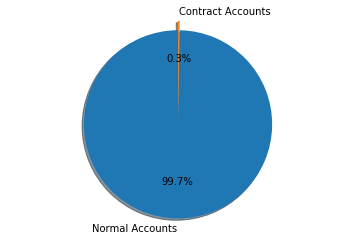

---------
Normal Accounts:  1739274
Contract Accounts:  4570
Asset Accounts(Ignored):  27


In [10]:
print('Sum of accounts from 3 different account sheets:', normal_accounts + contract_accounts + asset_accounts)
print('Total accounts count in all accounts sheet:', total_accounts)

"""
Draw Pie
"""
print('---------')
labels = 'Normal Accounts', 'Contract Accounts'
sizes = [normal_accounts, contract_accounts]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print('---------')
print('Normal Accounts: ', normal_accounts)
print('Contract Accounts: ', contract_accounts)
print('Asset Accounts(Ignored): ', asset_accounts)

## 3. Calculate Airdrop Ratio
__[airdrop amount]__

In [11]:
AIRDROP_AMOUNT = 10890000000
print('Airdrop Amount(Million):', AIRDROP_AMOUNT/1000000)

Airdrop Amount(Million): 10890.0


In [12]:
print('Airdrop Ratio SUN/BTT', total_balance/AIRDROP_AMOUNT)
print('Airdrop Ratio TRX/BTT', (total_balance/1000000)/AIRDROP_AMOUNT)

Airdrop Ratio SUN/BTT 9115464.842232378
Airdrop Ratio TRX/BTT 9.115464842232377


## 4. Trim Data

In [13]:
black_list = copy.deepcopy(BLACK_LIST)
# normal_acc_data = normal_acc_data.drop(normal_acc_data[normal_acc_data['address'] in black_list].index)
while len(black_list):
    acc = black_list.pop()
    normal_acc_data = normal_acc_data.drop(normal_acc_data[normal_acc_data['address'] == acc].index)
    
# print(normal_acc_data.loc[normal_acc_data['address'] == 'TLsV52sRDL79HXGGm9yzwKibb6BeruhUzy'])
blacklist_trimed_accounts = len(normal_acc_data['balance']) - 1
print('Black list trimed off accounts amount: ', normal_accounts - blacklist_trimed_accounts)
print('Accounts left amount: ', blacklist_trimed_accounts)

normal_acc_data = normal_acc_data.drop(normal_acc_data[normal_acc_data['balance'] < THREADHOLD].index)
ready2airdrop_accounts = len(normal_acc_data['balance']) - 1
print('Threadhold trimed off accounts amount: ', blacklist_trimed_accounts - ready2airdrop_accounts)
print('Accounts left amount: ', ready2airdrop_accounts)

Black list trimed off accounts amount:  23
Accounts left amount:  1739251
Threadhold trimed off accounts amount:  954882
Accounts left amount:  784369


## 5. Generate Airdrop List
```
scp account.csv congfullnode@40.83.218.12:~/AD
```

In [14]:
normal_acc_data = normal_acc_data.drop(normal_acc_data[normal_acc_data['address'] == 'total'].index)
normal_acc_data = normal_acc_data.sort_values(by=['balance'], ascending=False)
normal_acc_data.to_csv(AIRDROP_FILE_NAME, encoding='utf-8', index=False)

In [15]:
data = pd.read_csv(AIRDROP_FILE_NAME)
print('data: ', data.head())
print(len(data['balance']) - 1)

data:                                address            balance
0  TMuA6YqfCeX8EhbfYEg5y7S4DqzSJireY9  15019457351514896
1  TAahLbGTZk6YuCycii72datPQEtyC5x231   4524716545475091
2  TTiRNa312qQbvkjRGU3sHWVK3jZKSnNEXx   2712966593203613
3  TWd4WrZ9wn84f5x1hZhL4DHvk738ns5jwb   1860000000000000
4  TNaRAoLUyYEV2uF7GUrzSjRQTU8v5ZJ5VR   1559076961726350
784368


## 6. Transaction Cost

Only for reference.

### a. Bandwith Cost: 

In [16]:
bandwith_cost_min = ready2airdrop_accounts * TOKEN_NET_COST_MIN
bandwith_cost_max = ready2airdrop_accounts * TOKEN_NET_COST_MAX

print('Bandwith Cost Range: ', bandwith_cost_min, ' - ', bandwith_cost_max)

Bandwith Cost Range:  218838951  -  221976427


### b. TRX Burn Cost:

In [17]:
print('TRX Cost Range(sun): ', bandwith_cost_min*10, ' - ', bandwith_cost_max*10)
print('TRX Cost Range(trx): ', bandwith_cost_min*10/SUN, ' - ', bandwith_cost_max*10/SUN)

TRX Cost Range(sun):  2188389510  -  2219764270
TRX Cost Range(trx):  2188.38951  -  2219.76427


### c. Freeze Prepare:

In [18]:
bandwidth_freeze_ratio = 1 / DYNAMIC_TOTAL_NET_WEIGHT * 43200000000
print('Bandwidth Freeze Ratio: ', bandwidth_freeze_ratio)
print('TRX To Freeze For Bandwidth: ', bandwith_cost_min/bandwidth_freeze_ratio, ' - ', bandwith_cost_max/bandwidth_freeze_ratio)

Bandwidth Freeze Ratio:  6.278916829272772
TRX To Freeze For Bandwidth:  34852978.141031705  -  35352662.415455095


Since this is dynamic, please double the higher range.